Importing all the libraries needed for the project

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gdp
import seaborn as sb
from sklearn.cluster import KMeans

ETL

In [131]:
crops_yields=pd.read_csv('D:\\Coding Repository\\Assignment 2\\Project\\Palette_Final_Project\\rm_crop_yields_1938_2021.csv')

EDA

In [132]:
crops_yields.dtypes

Year              int64
RM                int64
Winter Wheat    float64
Canola          float64
Spring Wheat    float64
Mustard         float64
Durum           float64
Sunflowers      float64
Oats            float64
Lentils         float64
Peas            float64
Barley          float64
Fall Rye        float64
Canary Seed     float64
Spring Rye      float64
Tame Hay        float64
Flax            float64
Chickpeas       float64
dtype: object

In [133]:
crops_yields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25017 entries, 0 to 25016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25017 non-null  int64  
 1   RM            25017 non-null  int64  
 2   Winter Wheat  3037 non-null   float64
 3   Canola        14008 non-null  float64
 4   Spring Wheat  24924 non-null  float64
 5   Mustard       4487 non-null   float64
 6   Durum         11581 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          23913 non-null  float64
 9   Lentils       5515 non-null   float64
 10  Peas          8134 non-null   float64
 11  Barley        24703 non-null  float64
 12  Fall Rye      15847 non-null  float64
 13  Canary Seed   3819 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          20934 non-null  float64
 17  Chickpeas     960 non-null    float64
dtypes: float64(16), int64(2)
m

In [134]:
crops_yields.agg(['mean','std'])

,Year,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
mean,1979.385938,248.957509,38.24350,24.146796,25.778733,844.185955,29.024429,692.629915,47.104433,1171.778849,30.971982,38.022104,21.225298,995.140223,7.575776,1.181520,14.287663,1408.060594
std,24.221744,148.829628,12.20715,9.209177,11.153028,275.700375,9.829962,555.776604,21.775369,408.937628,10.223101,16.610425,10.101176,354.208181,12.473814,0.654725,7.082308,579.635067


In [135]:
crops_yields.isna().sum()

Year                0
RM                  0
Winter Wheat    21980
Canola          11009
Spring Wheat       93
Mustard         20530
Durum           13436
Sunflowers      24071
Oats             1104
Lentils         19502
Peas            16883
Barley            314
Fall Rye         9170
Canary Seed     21198
Spring Rye      24212
Tame Hay        20812
Flax             4083
Chickpeas       24057
dtype: int64

<AxesSubplot: xlabel='Year'>

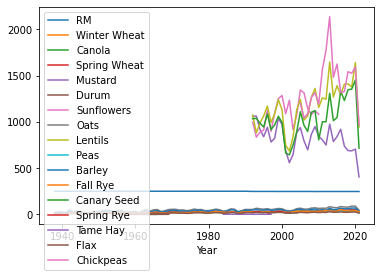

In [136]:
crops_yields.groupby('Year').mean().plot()

There is alot of missing Data before 1965.

In [137]:
new_yields=crops_yields.loc[crops_yields['Year']>1965]
new_yields.mean()

Year            1993.411835
RM               248.535777
Winter Wheat      38.243500
Canola            24.170953
Spring Wheat      29.990710
Mustard          844.185955
Durum             29.059558
Sunflowers       692.629915
Oats              55.341940
Lentils         1171.778849
Peas              30.971982
Barley            45.049310
Fall Rye          25.222747
Canary Seed      995.140223
Spring Rye         7.575776
Tame Hay           1.181520
Flax              17.497225
Chickpeas       1408.060594
dtype: float64

Some of the crops seems to have the crops yield in pounds.

In [138]:
new_yields['Mustard']=new_yields['Mustard']/50
new_yields['Sunflowers']=new_yields['Sunflowers']/30
new_yields['Lentils']=new_yields['Lentils']/60
new_yields['Canary Seed']=new_yields['Canary Seed']/50
new_yields['Chickpeas']=new_yields['Chickpeas']/60

C:\Users\96654\AppData\Local\Temp\ipykernel_12140\278884069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_yields['Mustard']=new_yields['Mustard']/50
C:\Users\96654\AppData\Local\Temp\ipykernel_12140\278884069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_yields['Sunflowers']=new_yields['Sunflowers']/30
C:\Users\96654\AppData\Local\Temp\ipykernel_12140\278884069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

<AxesSubplot: xlabel='Year'>

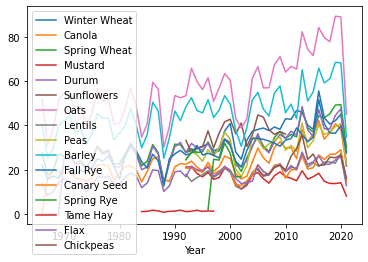

In [139]:
drawing=new_yields.drop('RM',axis=1)
drawing.groupby('Year').mean().plot()

In [140]:
new_yields.isna().sum()

Year                0
RM                  0
Winter Wheat    13608
Canola           2651
Spring Wheat       84
Mustard         12158
Durum            5078
Sunflowers      15699
Oats             1039
Lentils         11130
Peas             8511
Barley            238
Fall Rye         6574
Canary Seed     12826
Spring Rye      15840
Tame Hay        12440
Flax             2929
Chickpeas       15685
dtype: int64

Replacing the null value with the mean of each RM.

In [141]:
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean()))

clean_yields.isna().sum()

Year               0
RM                 0
Winter Wheat     866
Canola             0
Spring Wheat       0
Mustard         1338
Durum            193
Sunflowers       127
Oats               0
Lentils          722
Peas              51
Barley             0
Fall Rye           0
Canary Seed      485
Spring Rye        51
Tame Hay           0
Flax              26
Chickpeas       9478
dtype: int64

There is still null values because some RM did not grow these crops.

<AxesSubplot: xlabel='Year'>

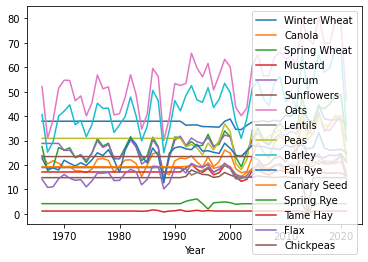

In [142]:
draw=clean_yields.drop('RM',axis=1)
draw.groupby('Year').mean().plot()

In [143]:
mean=clean_yields.mean()
std=clean_yields.std()

mean_df=pd.DataFrame(mean,columns=['Mean'])
std_df=pd.DataFrame(std,columns=['Standar Deviation'])
result = pd.concat([mean_df, std_df], axis=1).reset_index()


print(result)

           index         Mean  Standar Deviation
0           Year  1993.411835          16.158413
1             RM   248.535777         148.618152
2   Winter Wheat    37.947842           8.959109
3         Canola    24.024063           8.500990
4   Spring Wheat    29.971420          10.181281
5        Mustard    17.168749           3.998844
6          Durum    28.918544           8.458377
7     Sunflowers    14.849909          12.701945
8           Oats    54.990747          19.897928
9        Lentils    18.970276           5.328606
10          Peas    30.936464           7.558305
11        Barley    44.972777          14.567851
12      Fall Rye    24.911432           7.832239
13   Canary Seed    19.312425           4.960888
14    Spring Rye     4.183012           7.153335
15      Tame Hay     1.175808           0.384171
16          Flax    17.380706           5.824830
17     Chickpeas    23.470902           6.548466


In [144]:
clean_yields.mean().nlargest(7)

Year            1993.411835
RM               248.535777
Oats              54.990747
Barley            44.972777
Winter Wheat      37.947842
Peas              30.936464
Spring Wheat      29.971420
dtype: float64

The Largest yield crops are Oats, Barley, Winter Wheat, Peas, Spring Wheat. 
They will be my main focus and I am interested in the Canola Also.

**CANOLA**

In [145]:
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean()))
clean_canola = clean_yields
drop_list=['Year','Winter Wheat','Spring Wheat','Mustard','Durum','Sunflowers','Oats','Lentils','Peas','Barley','Fall Rye','Canary Seed','Spring Rye','Tame Hay','Flax','Chickpeas']
clean_canola.drop(drop_list,axis=1,inplace=True)
clean_canola.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16645 entries, 28 to 25016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      16645 non-null  int64  
 1   Canola  16645 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 390.1 KB


In [146]:
mean=clean_canola.groupby('RM').mean().reset_index()
std=clean_canola.groupby('RM').std().reset_index()

mean_df = pd.DataFrame(mean['Canola']).add_suffix('_mean')
std_df = pd.DataFrame(std['Canola']).add_suffix('_std')

result = pd.concat([mean[['RM']], mean_df, std_df], axis=1, sort=False)
print(result)

      RM  Canola_mean  Canola_std
0      1    21.947115    7.207846
1      2    23.679808    6.745473
2      3    22.665962    6.483511
3      4    21.255208    6.855041
4      5    20.949767    7.517036
..   ...          ...         ...
294  529    18.694737    4.903752
295  555    22.702791    9.519565
296  561    24.677200    9.209394
297  588    24.843455    8.726299
298  622    22.904727   10.884663

[299 rows x 3 columns]


C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

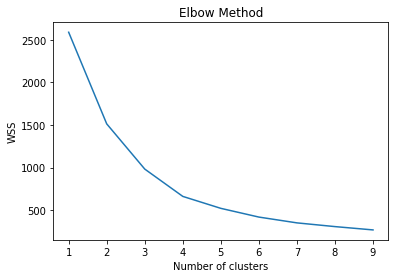

In [147]:
wss = []
data = result[['Canola_mean', 'Canola_std']].values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


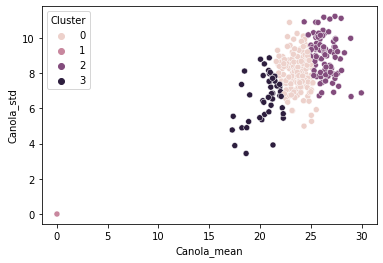

In [148]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(data)
result['Cluster'] = labels
sb.scatterplot(x='Canola_mean', y='Canola_std', hue='Cluster', data=result)
plt.show()
result.to_csv('D:\\Canola.csv')

**Oats**

In [149]:
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean()))
clean_Oats = clean_yields
drop_list=['Year','Winter Wheat','Spring Wheat','Mustard','Durum','Sunflowers','Canola','Lentils','Peas','Barley','Fall Rye','Canary Seed','Spring Rye','Tame Hay','Flax','Chickpeas']
clean_Oats.drop(drop_list,axis=1,inplace=True)
clean_Oats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16645 entries, 28 to 25016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      16645 non-null  int64  
 1   Oats    16645 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 390.1 KB


In [150]:
mean=clean_Oats.groupby('RM').mean().reset_index()
std=clean_Oats.groupby('RM').std().reset_index()

mean_ot = pd.DataFrame(mean['Oats']).add_suffix('_mean')
std_ot = pd.DataFrame(std['Oats']).add_suffix('_std')

result_oats = pd.concat([mean[['RM']], mean_ot, std_ot], axis=1, sort=False)
print(result_oats)

      RM  Oats_mean   Oats_std
0      1  54.681607  19.987656
1      2  55.366964  15.428727
2      3  52.783393  13.517171
3      4  46.248868  14.002380
4      5  44.538298  13.435672
..   ...        ...        ...
294  529  42.700000  13.595588
295  555  57.792340  19.156176
296  561  59.393922  17.616681
297  588  61.335536  17.626200
298  622  57.109107  24.468937

[299 rows x 3 columns]


C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

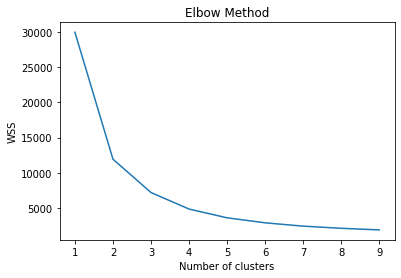

In [151]:
wss = []
data = result_oats[['Oats_mean', 'Oats_std']].values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


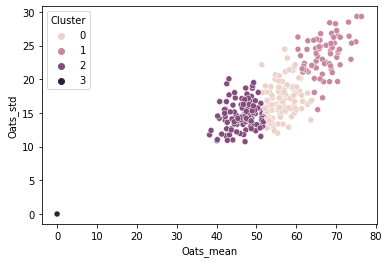

In [152]:
data = result_oats[['Oats_mean', 'Oats_std']].values
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(data)
result_oats['Cluster'] = labels
sb.scatterplot(x='Oats_mean', y='Oats_std', hue='Cluster', data=result_oats)
plt.show()
result_oats.to_csv('D:\\Oats.csv')

**Barley**

In [153]:
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean()))
clean_Barley = clean_yields
drop_list=['Year','Winter Wheat','Spring Wheat','Mustard','Durum','Sunflowers','Canola','Lentils','Peas','Oats','Fall Rye','Canary Seed','Spring Rye','Tame Hay','Flax','Chickpeas']
clean_Barley.drop(drop_list,axis=1,inplace=True)
clean_Barley.info()

mean=clean_Barley.groupby('RM').mean().reset_index()
std=clean_Barley.groupby('RM').std().reset_index()

mean_Ba = pd.DataFrame(mean['Barley']).add_suffix('_mean')
std_Ba = pd.DataFrame(std['Barley']).add_suffix('_std')

result_Barley = pd.concat([mean[['RM']], mean_Ba, std_Ba], axis=1, sort=False)
print(result_Barley)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16645 entries, 28 to 25016
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RM      16645 non-null  int64  
 1   Barley  16645 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 390.1 KB
      RM  Barley_mean  Barley_std
0      1    45.957091   16.474071
1      2    46.186607   12.080910
2      3    47.354286   13.372542
3      4    38.014107   10.906272
4      5    40.761321   15.522958
..   ...          ...         ...
294  529    35.731818   10.517505
295  555    40.117250   12.389379
296  561    45.556604   14.131719
297  588    47.992679   15.139992
298  622    43.139273   14.838780

[299 rows x 3 columns]


C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

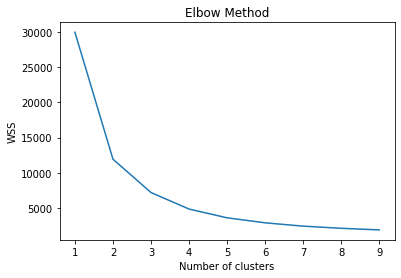

In [154]:
wss = []
data = result_oats[['Oats_mean', 'Oats_std']].values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


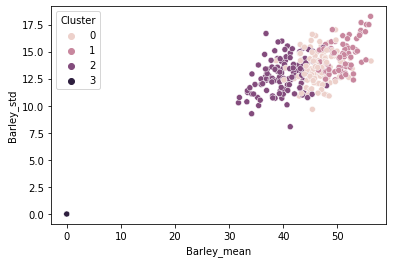

In [155]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(data)
result_Barley['Cluster'] = labels
sb.scatterplot(x='Barley_mean', y='Barley_std', hue='Cluster', data=result_Barley)
plt.show()
result_Barley.to_csv('D:\\Barly.csv')

**Winter Wheat**

In [179]:
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean()))
clean_ww= clean_yields.dropna()
drop_list=['Year','Barley','Spring Wheat','Mustard','Durum','Sunflowers','Canola','Lentils','Peas','Oats','Fall Rye','Canary Seed','Spring Rye','Tame Hay','Flax','Chickpeas']
clean_ww.drop(drop_list,axis=1,inplace=True)

mean=clean_ww.groupby('RM').mean().reset_index()
std=clean_ww.groupby('RM').std().reset_index()

mean_ww = pd.DataFrame(mean['Winter Wheat']).add_suffix('_mean')
std_ww = pd.DataFrame(std['Winter Wheat']).add_suffix('_std')

result_ww = pd.concat([mean[['RM']], mean_ww, std_ww], axis=1, sort=False)


C:\Users\96654\AppData\Local\Temp\ipykernel_12140\142382270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ww.drop(drop_list,axis=1,inplace=True)


In [159]:
globe=gdp.read_file('C:\\Users\\96654\\Documents\\GitHub\\Palette_Training_5\\Rural Municipality\\Rural Municipality.shp')
globe['RM']=globe['RMNO'].astype('int')


In [160]:

from scipy.stats import shapiro

# assuming your variable is in a column named 'Canola'
data = clean_canola['Canola'].values

# perform Shapiro-Wilk test
stat, p = shapiro(data)

# interpret the test result
alpha = 0.05
if p > alpha:
    print('Variable is normally distributed (fail to reject H0)')
else:
    print('Variable is not normally distributed (reject H0)')

Variable is not normally distributed (reject H0)


C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [180]:
from scipy.stats import kstest, norm

# assuming your variable is in a column named 'Canola'
data = clean_canola['Canola'].values

# perform Kolmogorov-Smirnov test against a normal distribution
stat, p = kstest(data, norm.cdf, args=(data.mean(), data.std()))

# interpret the test result
alpha = 0.05
if p > alpha:
    print('Variable is normally distributed (fail to reject H0)')
else:
    print('Variable is not normally distributed (reject H0)')

Variable is not normally distributed (reject H0)


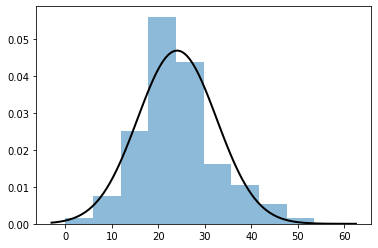

In [162]:
import scipy.stats as stats
# Assume your variable is stored in a dataframe called "df" and is named "Var1"
var1 = clean_canola['Canola']

# Plot a histogram of Var1
plt.hist(var1, density=True, alpha=0.5)

# Calculate the mean and standard deviation of Var1
mean = var1.mean()
std = var1.std()

# Calculate the PDF (probability density function) of a normal distribution with the same mean and std as Var1
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)

# Add a line representing the normal distribution
plt.plot(x, p, 'k', linewidth=2)

plt.show()
#This code will plot a histogram of the variable Var1, with a line representing the normal distribution with the same mean and standard deviation as Var1. You can visually inspect the plot to determine if the variable follows a normal distribution or not.



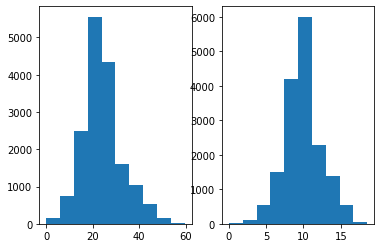

In [163]:
from scipy import stats

data = clean_canola['Canola']

shifted_data = data + abs(np.min(data)) + 1

# apply Box-Cox transformation
transformed_data, lambda_ = stats.boxcox(shifted_data)

# plot the original and transformed data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].hist(data)
ax[1].hist(transformed_data)
plt.show()
#This code generates some skewed data using a gamma distribution, applies the Box-Cox transformation to the data, and plots the original and transformed data using histograms. The transformed data should be approximately normally distributed.


In [164]:
merge=pd.merge(globe,result, on=['RM'],how='inner')
merge.explore(column='Cluster',cmap='tab20c')
merge.to_csv('D:\\merge.csv', index=False)


In [165]:
wss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[21.94711538 21.94711538 21.94711538 ... 46.1        40.9
 23.9       ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.